In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from datetime import datetime as dt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200305T000000Z_20200313T210509Z-NaN.csv',skipinitialspace=True)
df.head(2)

,"#""Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)""","""Conductivity (S/m)""","""Conductivity QC Flag""","""Density (kg/m3)""","""Density QC Flag""","""Practical Salinity (psu)""","""Practical Salinity QC Flag""","""Pressure (decibar)""","""Pressure QC Flag""","""Sigma-t (kg/m3)""","""Sigma-t QC Flag""","""Sigma-theta (0 dbar) (kg/m3)""","""Sigma-theta (0 dbar) QC Flag""","""Sound Speed (m/s)""","""Sound Speed QC Flag""","""Temperature (C)""","""Temperature QC Flag"""
0,2020-03-05T00:00:00.333Z,3.07789,1,1022.934398,1,29.2225,1,41.687,1,22.742435,1,22.742954,1,1475.944,1,7.9844,1
1,2020-03-05T00:00:01.353Z,3.07792,1,1022.934485,1,29.2227,1,41.672,1,22.742592,1,22.743110,1,1475.945,1,7.9844,1


In [17]:
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity',df.columns[15]: 'Temperature'},inplace=True)

In [6]:
df.head(2)

,UTC time,Conductivity,Conductivity QC Flag,Density (kg/m3),Density QC Flag,Practical Salinity (psu),Practical Salinity QC Flag,Pressure (decibar),Pressure QC Flag,Sigma-t (kg/m3),Sigma-t QC Flag,Sigma-theta (0 dbar) (kg/m3),Sigma-theta (0 dbar) QC Flag,Sound Speed (m/s),Sound Speed QC Flag,Temperature,Temperature QC Flag
0,2020-01-17T03:00:00.509Z,2.97789,1,1022.445837,1,28.7113,1,4.370,1,22.425628,1,22.425675,1,1472.233,1,7.3472,1
1,2020-01-17T03:00:01.522Z,2.97792,1,1022.446082,1,28.7116,1,4.372,1,22.425863,1,22.425911,1,1472.234,1,7.3472,1


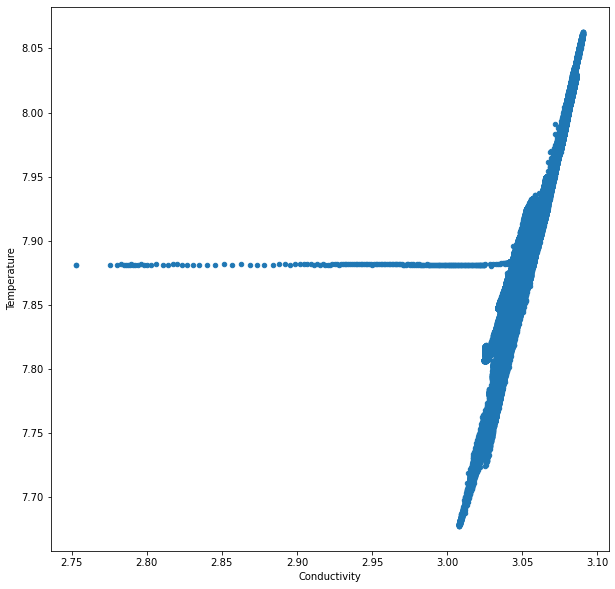

In [18]:
df.rename(columns={df.columns[1]: 'Conductivity'},inplace=True)
df.rename(columns={df.columns[15]: 'Temperature'}, inplace=True)
df.reset_index(drop=True, inplace=True)
fig = df.plot.scatter(x='Conductivity',y='Temperature',figsize=(10,10))

In [19]:
from datetime import datetime


df['UTC time'] = df['UTC time'].apply(lambda x:datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%fZ"))
df['UTC time'].head(2)

0   2020-03-05 00:00:00.333
1   2020-03-05 00:00:01.353
Name: UTC time, dtype: datetime64[ns]

In [9]:
import matplotlib.dates as mdates

In [10]:
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import numpy as np
# modified hsv in 256 color class
hsv_modified = cm.get_cmap('hsv', 256)
newcmp = ListedColormap(hsv_modified(np.linspace(0.6,1,256)))# blue to red

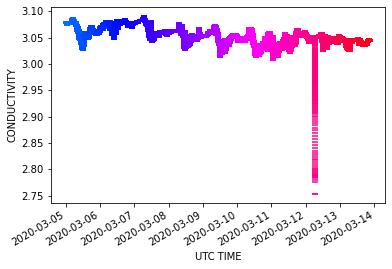

In [20]:
plt.scatter(df['UTC time'],df['Conductivity'], c= df['UTC time'],marker='_',  cmap =newcmp)
plt.xlabel("UTC TIME")
plt.ylabel("CONDUCTIVITY")
plt.gcf().autofmt_xdate()

[Text(1, 1.5834e+18, '2020-03-05'),
 Text(1, 1.5835e+18, '2020-03-06'),
 Text(1, 1.5836e+18, '2020-03-07'),
 Text(1, 1.5837e+18, '2020-03-08'),
 Text(1, 1.5838e+18, '2020-03-09'),
 Text(1, 1.5839e+18, '2020-03-10'),
 Text(1, 1.584e+18, '2020-03-11'),
 Text(1, 1.5841e+18, '2020-03-12')]

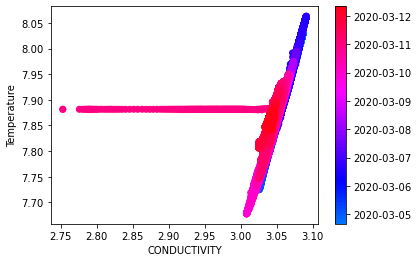

In [21]:
fig, ax = plt.subplots()
sc = ax.scatter(df['Conductivity'],df['Temperature'], c=df['UTC time'],  cmap =newcmp)
plt.ylabel("Temperature")
plt.xlabel("CONDUCTIVITY")

cb = fig.colorbar(sc, orientation='vertical')

cb.ax.set_yticks(["2020-03-05","2020-03-06","2020-03-07","2020-03-08","2020-03-09","2020-03-10","2020-03-11","2020-03-12","2020-03-13","2020-03-14"])
cb.ax.set_yticklabels(["2020-03-05","2020-03-06","2020-03-07","2020-03-08","2020-03-09","2020-03-10","2020-03-11","2020-03-12","2020-03-13","2020-03-14"])

In [12]:
df['UTC time'].iloc[0]

Timestamp('2020-01-17 03:00:00.509000')

In [13]:
df['UTC time'].iloc[-1]

Timestamp('2020-01-19 23:59:59.920000')

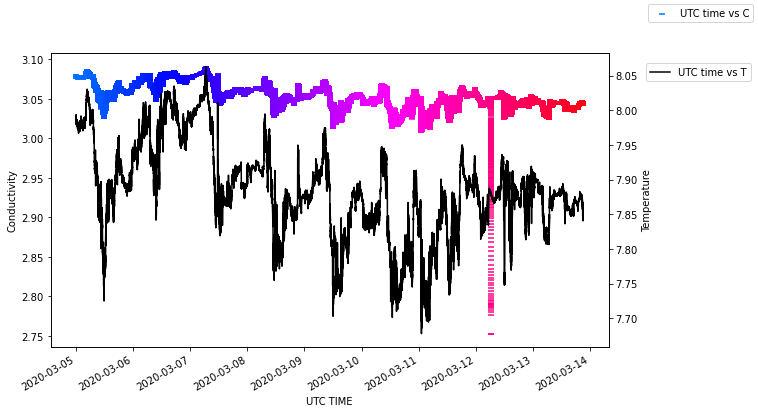

In [22]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('UTC TIME') 
ax1.set_ylabel('Conductivity') 
ax1.scatter(df['UTC time'], df['Conductivity'], c=df['UTC time'],marker='_',  cmap =newcmp, label = 'UTC time vs C') 
fig.legend()

ax2 = ax1.twinx() 
ax2.set_ylabel('Temperature') 
ax2.plot(df['UTC time'], df['Temperature'],color ='black', label='UTC time vs T') 
plt.gcf().autofmt_xdate()
fig.set_size_inches(10, 6, forward=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)